<a href="https://colab.research.google.com/github/kunamneni117/Introduction-To-Machine-Learning/blob/Developement/Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,TransformerMixin

In [5]:
!pip install sklearn_features

In [0]:
from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import Pipeline,FeatureUnion

In [0]:
MNIST_Data = pd.read_csv('/content/train.csv')

In [8]:
print(MNIST_Data.shape)

(42000, 785)


In [0]:
MNIST_Data_Features = MNIST_Data.values[:,1:]
MNIST_Data_Labels = MNIST_Data.values[:,0]

In [25]:
print(MNIST_Data_Features.shape,MNIST_Data_Labels.shape)

(42000, 784) (42000,)


In [0]:
import matplotlib

In [0]:
def Random_Image(Data):
  """Picks a Random Row and reshapes the row in such a way and it prints a image"""
  Random_Row = np.random.randint(len(Data))
  plt.imshow(Data[Random_Row].reshape(28,28),cmap=matplotlib.cm.binary)

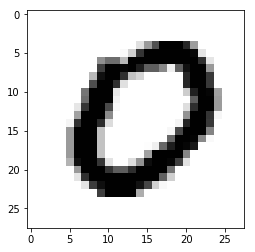

In [27]:
Random_Image(MNIST_Data_Features)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(MNIST_Data_Features,MNIST_Data_Labels,random_state=42,test_size=0.22)

In [30]:
print(X_Train.shape,X_Test.shape)

(32760, 784) (9240, 784)


Creating a Binary Classifier Model and training to predict 5 integer and non 5 integer

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
Y_Train_5 = (Y_Train==5)
Y_Test_5 =(Y_Test==5)

In [0]:
SGD_classifier_Object = SGDClassifier(random_state=42)

In [33]:
SGD_classifier_Object.fit(X_Train,Y_Train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
Y_Pred = SGD_classifier_Object.predict(X_Test)

Implementing StratifiedKflod Cross Validation Method

In [0]:
from sklearn.model_selection import StratifiedKFold

In [0]:
from sklearn.base import clone

In [0]:
skfolds = StratifiedKFold(n_splits=3,random_state=42)

In [37]:
for train_index,test_index in skfolds.split(X_Train,Y_Train_5):
  X_Train_kflod = X_Train[train_index]
  X_Test_kflod = X_Train[test_index]
  Y_Train_kflod = Y_Train_5[train_index]
  Y_Test_kflod = Y_Train_5[test_index]
  SGD_Classifier_Clone = clone(SGD_classifier_Object)
  SGD_Classifier_Clone.fit(X_Train_kflod,Y_Train_kflod)
  Y_Pred_kflod = SGD_Classifier_Clone.predict(X_Test_kflod)
  n_correct = sum(Y_Pred_kflod==Y_Test_kflod)
  print(n_correct/len(Y_Test_kflod))

0.964197417818881
0.9561355311355312
0.9610770217052844


From this we thought of the model is very accurate BUT....

For Classification we use another set of tools for measuring the goodness of the  model

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [40]:
confusion_matrix(Y_Pred,Y_Test_5)

array([[8111,  105],
       [ 354,  670]])

In the Above matric 8111 is the True Negative and 105 is the false positive
354  is false negative and 670 is true positive

Precision = TP/TP+ FP
Recall = TP/TP+FN

In [0]:
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve

In [42]:
precision_score(Y_Pred,Y_Test_5)

0.864516129032258

In [43]:
recall_score(Y_Pred,Y_Test_5)

0.654296875

In [0]:
from sklearn.metrics import f1_score

In [45]:
f1_score(Y_Pred,Y_Test_5)

0.7448582545858811

F1Score is the Harmonic mean of Precision and Recall and acts a powerful indication of the wellness of the model